In [1]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')

Populating the interactive namespace from numpy and matplotlib


In [90]:
#Importing Data from the CSV file
import os
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q1")
print("Path has been changed to:\n", os.getcwd())

import numpy as np
#Importing Data X from the CSV file
X = np.genfromtxt('linearX.csv', delimiter='\n')

#Reshape X to add the Intercept term. Since n=1 here, X should be a 2x100 matrix. 
X=np.reshape(X, (-1,1))
X= np.append(np.ones((X.shape)), X, axis=1)
print(X.shape)

#Importing Data Y from the CSV file
Y = np.genfromtxt('linearY.csv', delimiter='\n')
Y = np.reshape(Y, (-1,1))
print(Y.shape)
#print(X, Y)
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques1")
print("Path changed back to python file directory:\n", os.getcwd())

m = X.shape[0]
n = X.shape[1]
print(m,n)

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q1
(100, 2)
(100, 1)
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques1
100 2


In [91]:
#parameter initialization
theta = np.zeros((2,1)) #initialize to zero
print(type(theta))
#print(theta)
alpha = 0.0001 # Learning Rate
#The model gives error on LR below 1e-4 (NAN)
print("Learning Rate=", alpha)

<class 'numpy.ndarray'>
Learning Rate= 0.0001


In [92]:
#define the hypothesis function
h_x = np.dot(X, theta)
#print(h_x.shape)
#print(X[1,0])
#print(Y.shape)

In [93]:
#define the cost function
def cost(X, theta, Y):
    h_x = np.dot(X, theta)
    cost = (1/2*X.shape[0]) * np.sum((Y-h_x)**2)
    return cost
cost_final = cost(X, theta, Y)
print(cost_final)

4966.279047145


In [94]:
#function for calculating the cost function gradient

def cost_grad(X, theta, Y):
   # print(X.shape)
   # print(Y.shape)
    temp = np.dot(X, theta)-Y
   # print(temp.shape)
    #theta_grad = np.zeros((1,2))
    theta_grad = np.zeros((2,1))
    theta_grad += np.dot(X.transpose(), temp)
    #for i in range(m):
        #theta_grad += temp[i] * X[i, 0:2]
        #theta_grad[0] += temp[i] * X[i, 0]
        #theta_grad[1] += temp[i] * X[i, 1]
    #print(theta_grad)
    #return theta_grad.transpose()
    return theta_grad    

temp = h_x-Y
theta_grad = np.zeros((2,1))
arr = X[1, 0:2]
print(arr.shape)
print(temp[1,0])
print(temp[1,0]*arr)
print(theta_grad.shape)
theta_grad = temp[1,0]*arr
print(theta_grad.shape)


In [7]:
#Method 1 - Without Normalization, Fixed EPOCHS = 10000-50000

for i in range(50000):
    #if i % 1000 == 0:
    #    print('{} steps done'.format(i))
    theta -= alpha * cost_grad(X, theta, Y)


In [8]:
#Method 2 - Without Normalization, and termination based on cost function
print(cost_final)
i=0
while(cost_final >= 0.02):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
    
print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

4966.279047145
0.011947898109836578
Cost is = 0.011947898109836578 in iterations = 1


In [9]:
#Method 3 - Without Normalization, and termination based on change in the cost function
i=0
print(cost_final)
while(abs(cost_grad(X, theta, Y)[1]) >= 0.0001):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
print("Cost is = {} in iterations = {}".format(cost_final, i))

0.011947898109836578
Cost is = 0.011947898109836578 in iterations = 0


Text(0, 0.5, 'y axis - value')

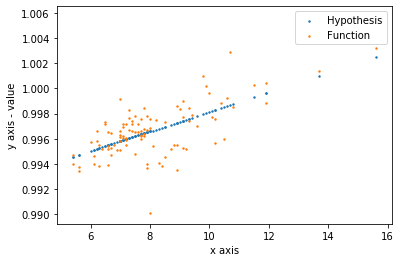

In [10]:
yhyp = np.dot(X, theta)
#print(yhyp)
plt.scatter(X[0:100,1], yhyp, s = 2, label='Hypothesis')
plt.scatter(X[0:100,1], Y, s = 2, label='Function')
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis - value')
#plt.savefig('plot_theta_1e-4_un.png', dpi=1000, bbox_inches='tight')

In [30]:
print(Y)

[[0.99523]
 [0.99007]
 [0.99769]
 [0.99386]
 [0.99508]
 [0.9963 ]
 [1.0032 ]
 [0.99768]
 [0.99584]
 [0.99609]
 [0.99774]
 [1.0003 ]
 [0.99694]
 [0.99965]
 [0.99549]
 [0.99364]
 [0.99378]
 [0.99379]
 [0.99524]
 [0.9988 ]
 [0.99733]
 [0.9966 ]
 [0.9955 ]
 [0.99471]
 [0.99354]
 [0.99786]
 [0.9965 ]
 [0.9988 ]
 [0.9964 ]
 [0.99713]
 [0.9985 ]
 [0.99565]
 [0.99578]
 [0.9976 ]
 [1.0014 ]
 [0.99685]
 [0.99648]
 [0.99472]
 [0.99914]
 [0.99408]
 [0.9974 ]
 [1.0002 ]
 [0.99402]
 [0.9966 ]
 [0.99402]
 [1.0029 ]
 [0.99718]
 [0.9986 ]
 [0.9952 ]
 [0.9952 ]
 [0.9972 ]
 [0.9976 ]
 [0.9968 ]
 [0.9978 ]
 [0.9951 ]
 [0.99629]
 [0.99656]
 [0.999  ]
 [0.99836]
 [0.99396]
 [0.99387]
 [1.0004 ]
 [0.9972 ]
 [0.9972 ]
 [0.99546]
 [0.9978 ]
 [0.99596]
 [0.99572]
 [0.9992 ]
 [0.99544]
 [0.99747]
 [0.99668]
 [0.9962 ]
 [0.99346]
 [0.99514]
 [0.99476]
 [1.001  ]
 [0.9961 ]
 [0.99598]
 [0.99608]
 [0.9966 ]
 [0.99732]
 [0.9962 ]
 [0.99546]
 [0.99738]
 [0.99456]
 [0.9966 ]
 [0.99553]
 [0.9984 ]
 [0.9952 ]
 [0.997  ]

In [95]:
#Normalization of the Input X

mean = np.mean(X[0:101,1])
var = np.std(X[0:101,1])
print(mean)
X[0:101,1] -= mean
X[0:101,1] /= var
#print(X)

# meanY = np.mean(Y)
# varY = np.std(Y)
# print(varY)
# print(meanY)
# Y =Y- meanY
# Y /= varY
#print(Y)


8.062


In [96]:
np.std(Y)

0.0020458995552079303

#Run cells 2, 3, and 4 after running cell 9 

In [13]:
#Method 1 - With Normalization, Fixed EPOCHS = 10000-50000

for i in range(50000):
    #if i % 1000 == 0:
    #    print('{} steps done'.format(i))
    theta -= alpha * cost_grad(X, theta, Y)


In [14]:
#Method 2 - With Normalization, and termination based on cost function
i=0
print(cost_final)
while(cost_final >= 0.02):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

0.011947898109836578
0.011947898109836578
Cost is = 0.011947898109836578 in iterations = 0


In [97]:
#Method 3 - With Normalization, and termination based on change in the cost function
i=0
cost_list= np.array([cost_final])
theta_all = theta
print(theta_all)
print(cost_final)
#cost_list = np.append(cost_list, cost_final)
while(abs(cost_grad(X, theta, Y)[1]) >= 0.0001):
    theta_all = np.append(theta_all,theta,axis=1)
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    cost_list = np.append(cost_list, cost_final)
    #cost_list.append(cost_final)
    #print(type(theta))
    #print(theta_all)
    i+=1

print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

[[0.]
 [0.]]
4966.279047145
0.014682531588060046
Cost is = 0.014682531588060046 in iterations = 717


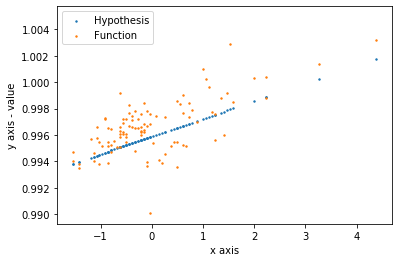

In [98]:

yhyp = np.dot(X, theta)
#print(yhyp)
plt.scatter(X[0:100,1], yhyp, s = 2, label='Hypothesis')
plt.scatter(X[0:100,1], Y, s = 2, label='Function')
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis - value')
plt.show()
#plt.savefig('plot_theta_1e-4_norm.png', dpi=1000, bbox_inches='tight')

In [99]:
print(theta_all[0][0::20])
print(theta_all[1][0::20])

[0.         0.17324384 0.32317495 0.44580464 0.54610431 0.62814011
 0.69523776 0.75011739 0.79500383 0.83171675 0.86174451 0.88630442
 0.90639214 0.92282202 0.93626014 0.94725127 0.95624099 0.96359375
 0.96960762 0.9745264  0.97854951 0.98184004 0.98453139 0.98673266
 0.98853309 0.99000568 0.99121012 0.99219524 0.99300098 0.99365999
 0.99419901 0.99463987 0.99500046 0.99529538 0.99553661 0.9957339 ]
[0.         0.00023297 0.00043459 0.00059949 0.00073437 0.00084469
 0.00093491 0.00100871 0.00106907 0.00111844 0.00115882 0.00119185
 0.00121886 0.00124096 0.00125903 0.00127381 0.0012859  0.00129578
 0.00130387 0.00131049 0.0013159  0.00132032 0.00132394 0.0013269
 0.00132932 0.0013313  0.00133292 0.00133425 0.00133533 0.00133622
 0.00133694 0.00133753 0.00133802 0.00133841 0.00133874 0.001339  ]


In [100]:
print(theta)

[[0.99588056]
 [0.0013392 ]]


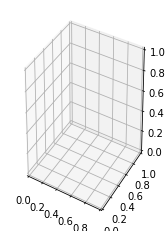

In [129]:
from mpl_toolkits.mplot3d import Axes3D
import collections

def error(t0, t1, points):
    temp_theta=np.array([[t0],[t1]])
    temp_hx=np.dot(points[0].x, temp_theta)
    totalError = np.sum((points[0].y - temp_hx) ** 2)
    return totalError

x = X
y = Y
Point = collections.namedtuple('Point', ['x', 'y'])
points = [Point(x, y)]
#print(points[0].x.shape)
#print(len(points))
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

# ms = theta_all[0]
# bs = theta_all[1]
# ms = ms[0::10]
# bs = bs[0::10]
theta0 = np.linspace(-1.0,3.0, 50)
theta1 = np.linspace(-1.0,3.0, 50)
theta0, theta1 = np.meshgrid(theta0, theta1)
cost_error = np.array([error(t0, t1, points) 
               for t0, t1 in zip(np.ravel(theta0), np.ravel(theta1))])
cost_plot = cost_error.reshape(theta0.shape)


#Plot scatter for actual theta's
theta_all0 = theta_all[0][0::20]
theta_all1 = theta_all[1][0::20]

theta_all0, theta_all1 = np.meshgrid(theta_all0,theta_all1)
cost_error = np.array([error(t0, t1, points) 
               for t0, t1 in zip(np.ravel(theta_all0), np.ravel(theta_all1))])
cost_actual = cost_error.reshape(theta_all0.shape)

In [130]:
ax.plot_surface(theta0, theta1, cost_plot, rstride=1, cstride=1, color='b', alpha=0.5)
ax.scatter(theta_all0, theta_all1, cost_actual, c='r', marker='^', depthshade=True)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')
fig.savefig('plot_cost.png', dpi=1000, bbox_inches='tight')

<a list of 6 text.Text objects>

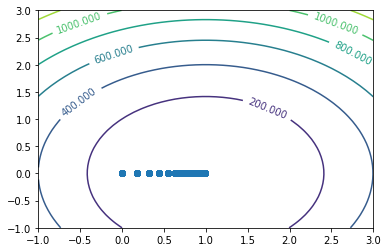

In [131]:
#ax = fig.add_subplot(122)
#plt.set_xlabel('t0')
#plt.set_ylabel('t1')
cp=plt.contour(theta0, theta1, cost_plot)
plt.xlim(right=np.amax(theta0), left=np.amin(theta0))
plt.ylim(top=np.amax(theta1), bottom=np.amin(theta1))
plt.scatter(theta_all0, theta_all1)
plt.clabel(cp, inline=1, fontsize=10)
#plt.gca().set_aspect('equal')
#fig.show()
#fig.savefig('plot_cost.png', dpi=1000)
